In [4]:
import sys
sys.path.append('/work/src')
from mesh import OrganMesh

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [32]:
from pathlib import Path


def draw(elev: int, azim: int, title: str, mesh: OrganMesh, save_file_path: Path) -> None:
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.view_init(elev=elev, azim=azim)
    ax.set_title(title, size=20)
    ax.set_xlabel("x", size=14)
    ax.set_ylabel("y", size=14)
    ax.set_zlabel("z", size=14)
    ax.set_ylim(80, -80)
    ax.set_xlim(75, -150)
    ax.set_zlim(130, -50)
    
    title = ax.text(x=0.5, y=1.01, z=0.0, s=title,
                        ha='center', va='bottom',
                        transform=ax.transAxes, fontsize='large')
    x, y, z = mesh.nodes[:, 0], mesh.nodes[:, 1], mesh.nodes[:, 2]
    ax.plot(x, y, z, color='blue', linestyle="", marker="o")
    # if ax.xaxis_inverted:
    #     ax.invert_xaxis()
    if ax.yaxis_inverted:
        ax.invert_yaxis()
    if ax.zaxis_inverted:
        ax.invert_zaxis()
    fig.savefig(save_file_path)

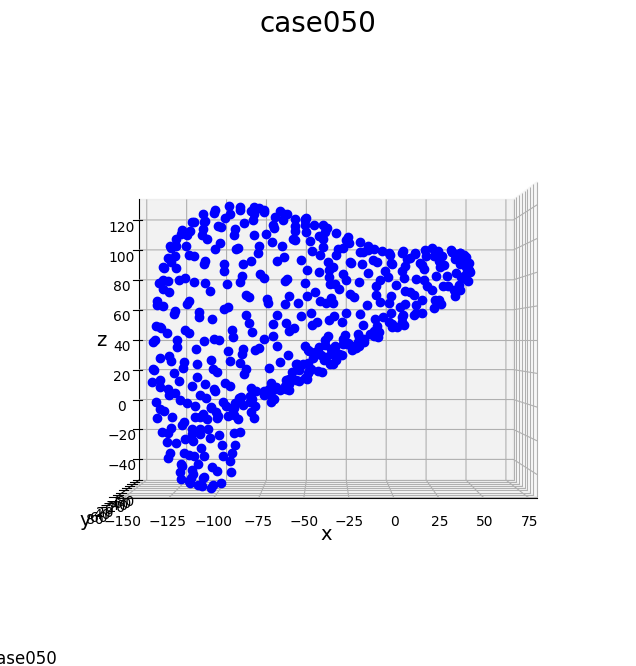

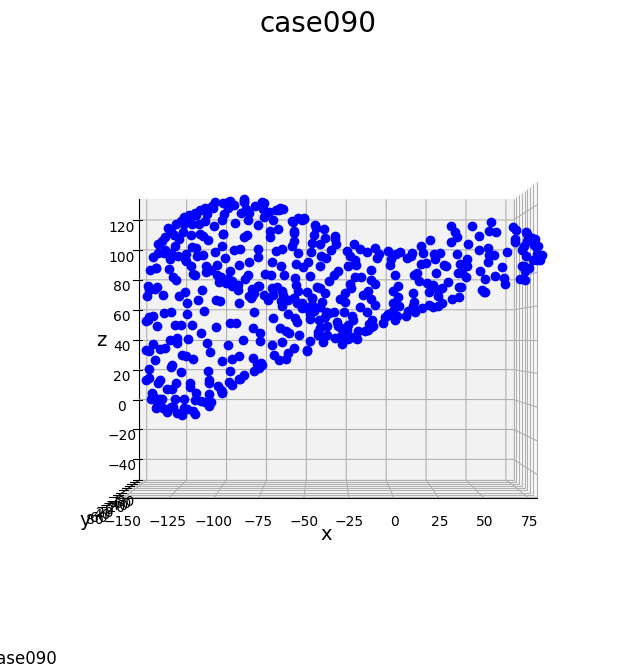

In [33]:
mesh50 = OrganMesh(Path("/work/3D-CT PLY/case050/00/output/liver.ply"))
mesh90 = OrganMesh(Path("/work/3D-CT PLY/case090/00/output/liver.ply"))
elev, azim = 0,90
draw(elev, azim, title='case050', mesh=mesh50, save_file_path="case050.png")
draw(elev, azim, title='case090', mesh=mesh90, save_file_path="case090.png")